# Explore Random Forest to predict the house price

- Identify the significant features that affect deeply on house sales price
- Analyze features related to house sales price and deliver insights into it
- Build random forest model to forcast house sales price accurately

In [1]:
#Import libraries 

from tqdm import tqdm
import numpy as np # for mathmatical operations
import pandas as pd #for managing the data
from itertools import accumulate
import matplotlib.pyplot as plt #for additional visualizing tool
import seaborn as sns #for visualizing the data
%matplotlib inline


In [2]:
# suppress warnings generated by written code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# for additional visual style
sns.set_context('notebook')
sns.set_style('white')
warn()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Load data

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3. Understand data


Prediction of house sales price based on various features on the datset helps buyers and sellers make data driven decision and assists real estate agents and economist in market analysis.

Machine learning in real estate market:
forcast house salea price from the historical data and predict accurate and reliable price

Random Forest algorithm:
A powerful machine learning tool to build multiple decision trees, useful algorithm for a dataset which has a large number of features and non-linear data

# 4. Data preprocessing:

A. data inspection and cleaning
This process involves removing incorrect and duplicated data, fixing incorrectly formatted or incomplete data within a dataset, and removing irrelevant observations to this project. Also, the process handles missing data and filters unwanted outliers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Check if there is any missing value in each column from the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#duplicate() method: verify if there are any duplicated values in the dataset

duplicates_df = df.duplicated()

#value_counts() method: display the sum of counts in false & true
duplicates_df.value_counts()

False    21613
dtype: int64

In [7]:
print("* The dimension of dataset: ",df.shape,'\n')
print("* Columns of the dataset:",df.columns) 

* The dimension of dataset:  (21613, 21) 

* Columns of the dataset: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# B. Statistical summary in distribution by describe() method

- describe() method: display statistical summary of numerical variables

- describe(include=['object']) method: display brief summary of categorical variables such as sum of count, frequency, top, and unique

In [9]:
# Data statistical distribution of numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [10]:
# Brief summary of categorical features
df.describe(include=['object'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


# C. Wrangling Data

This process includes data transformation of converting data from raw data format or structure into another format for analyzing. It is crucial step to shape raw data into usable forms to gain valuable insights.

In [11]:
#Change data types of 'bathroom' and 'floor' using astype()
df['bathroom'] = df['bathrooms'].astype("int64")
df['floors'] = df['floors'].astype("int64")

In [12]:
# Drop 'id', 'date' columns that do not affect on house sales price
df.drop(['id', 'date'], axis=1, inplace=True) 

# 'axis=1' indicates column, 
# 'inplace=True' indicates that we modify the dataframe itself instead of creating new one

In [13]:
# Unique values and frequency of each variable in a column
unique_value_df = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
for column in unique_value_df.columns.values.tolist():
    print(unique_value_df[column].value_counts(), '\n') 

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 

1    12590
2     8402
3      621
Name: floors, dtype: int64 

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64 

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64 



# 5. Analyzing & Visualizing data

Visualizing data is a critical step for delivering hidden patterns, trends, and insights in a way that is easy to understand. It supports discovering outliers and explaining the subsequent storytelling after visualizing data.

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>]], dtype=object)

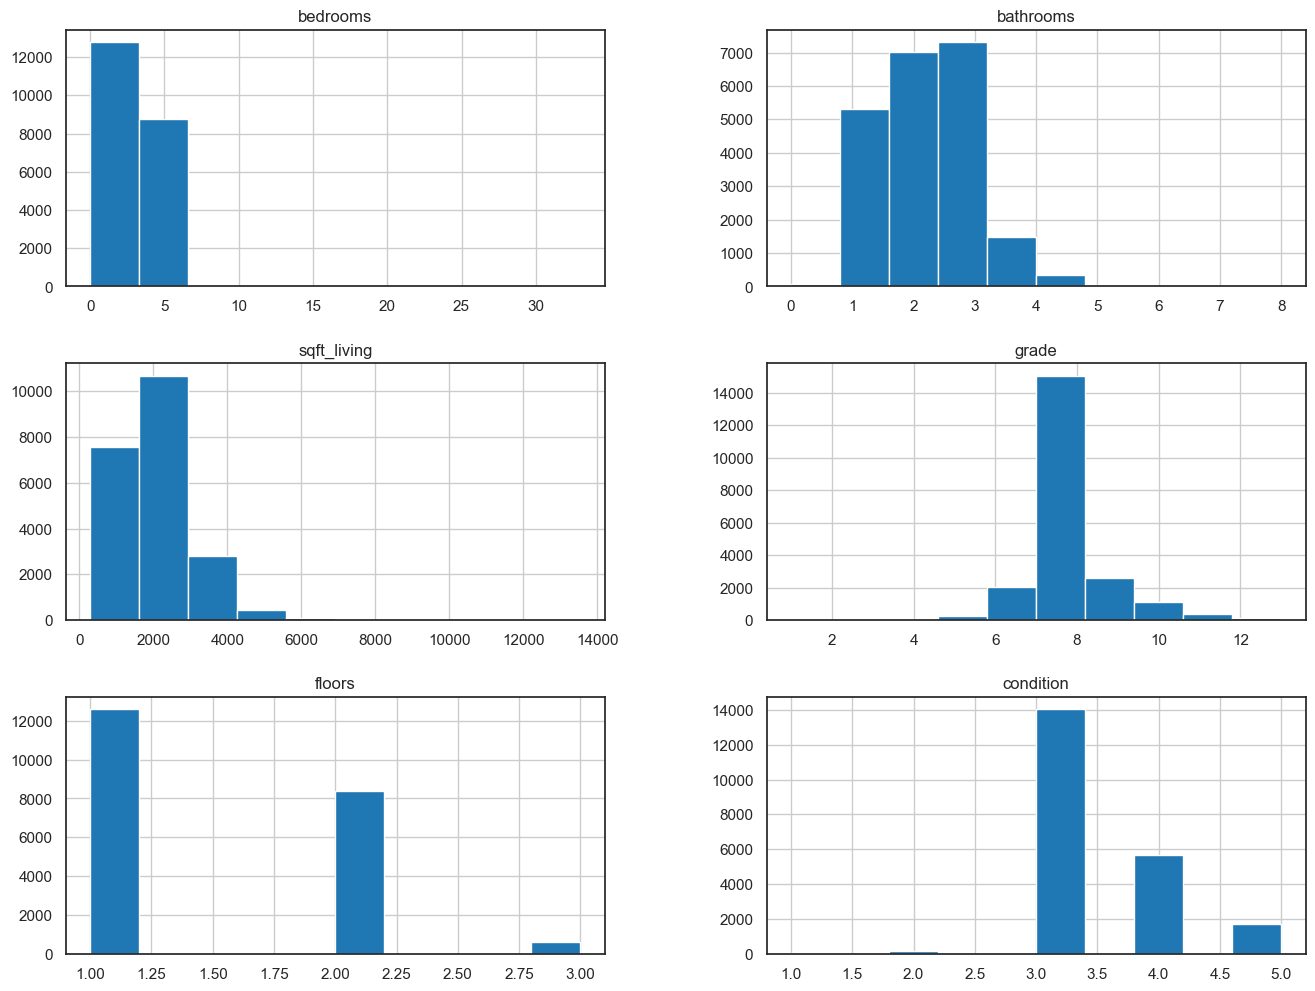

In [14]:
#Data distribution 
hist_df = df[['bedrooms', 'bathrooms', 'sqft_living','grade', 'floors', 'condition']]
hist_df.hist(figsize=(16, 12))

<AxesSubplot:xlabel='price', ylabel='Density'>

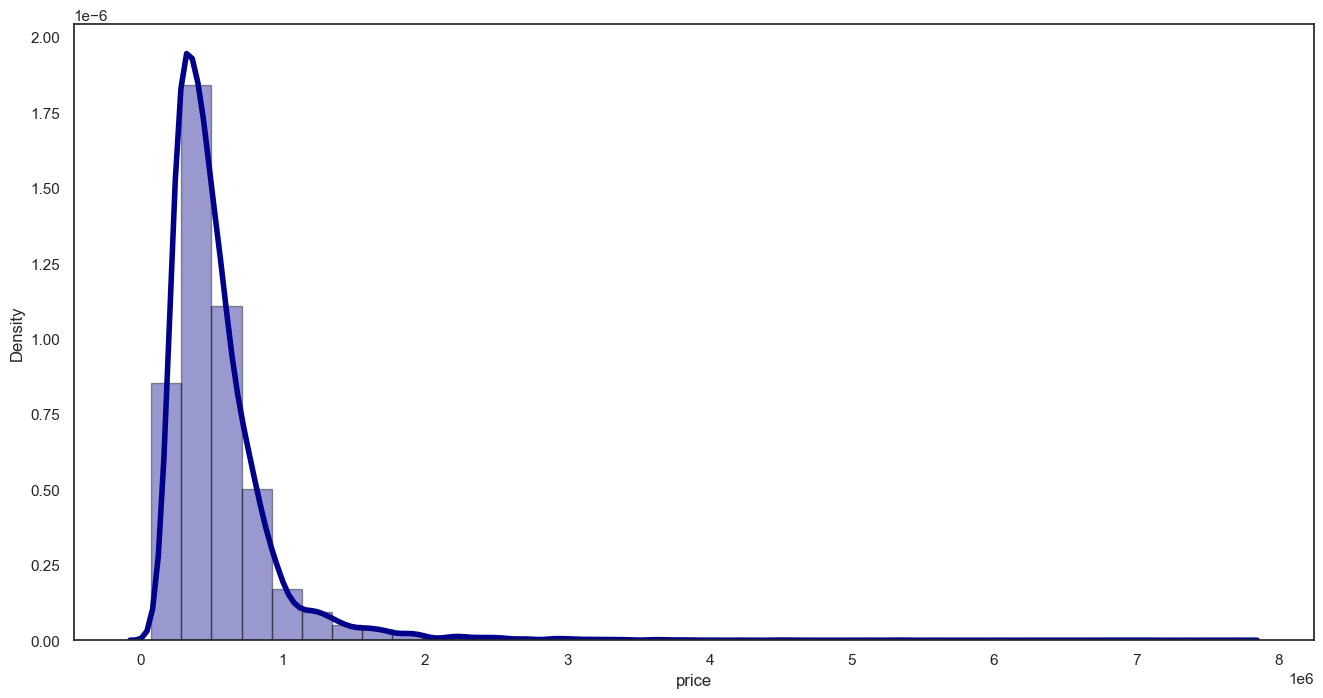

In [15]:
# Distribution of house sales price by densitiy 
plt.figure(figsize=(16,8))
sns.distplot(df['price'],hist=True, kde=True, 
            bins=int(180/5), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [16]:
# Boxplot of 'grade' vs. 'price'
plt.figure(figsize=(16, 8))
sns.color_palette('hls', 8)
sns.boxplot(df, x='grade', y='price', width=.6)

ValueError: Could not interpret input 'price'

<Figure size 1600x800 with 0 Axes>

ValueError: Could not interpret input 'price'

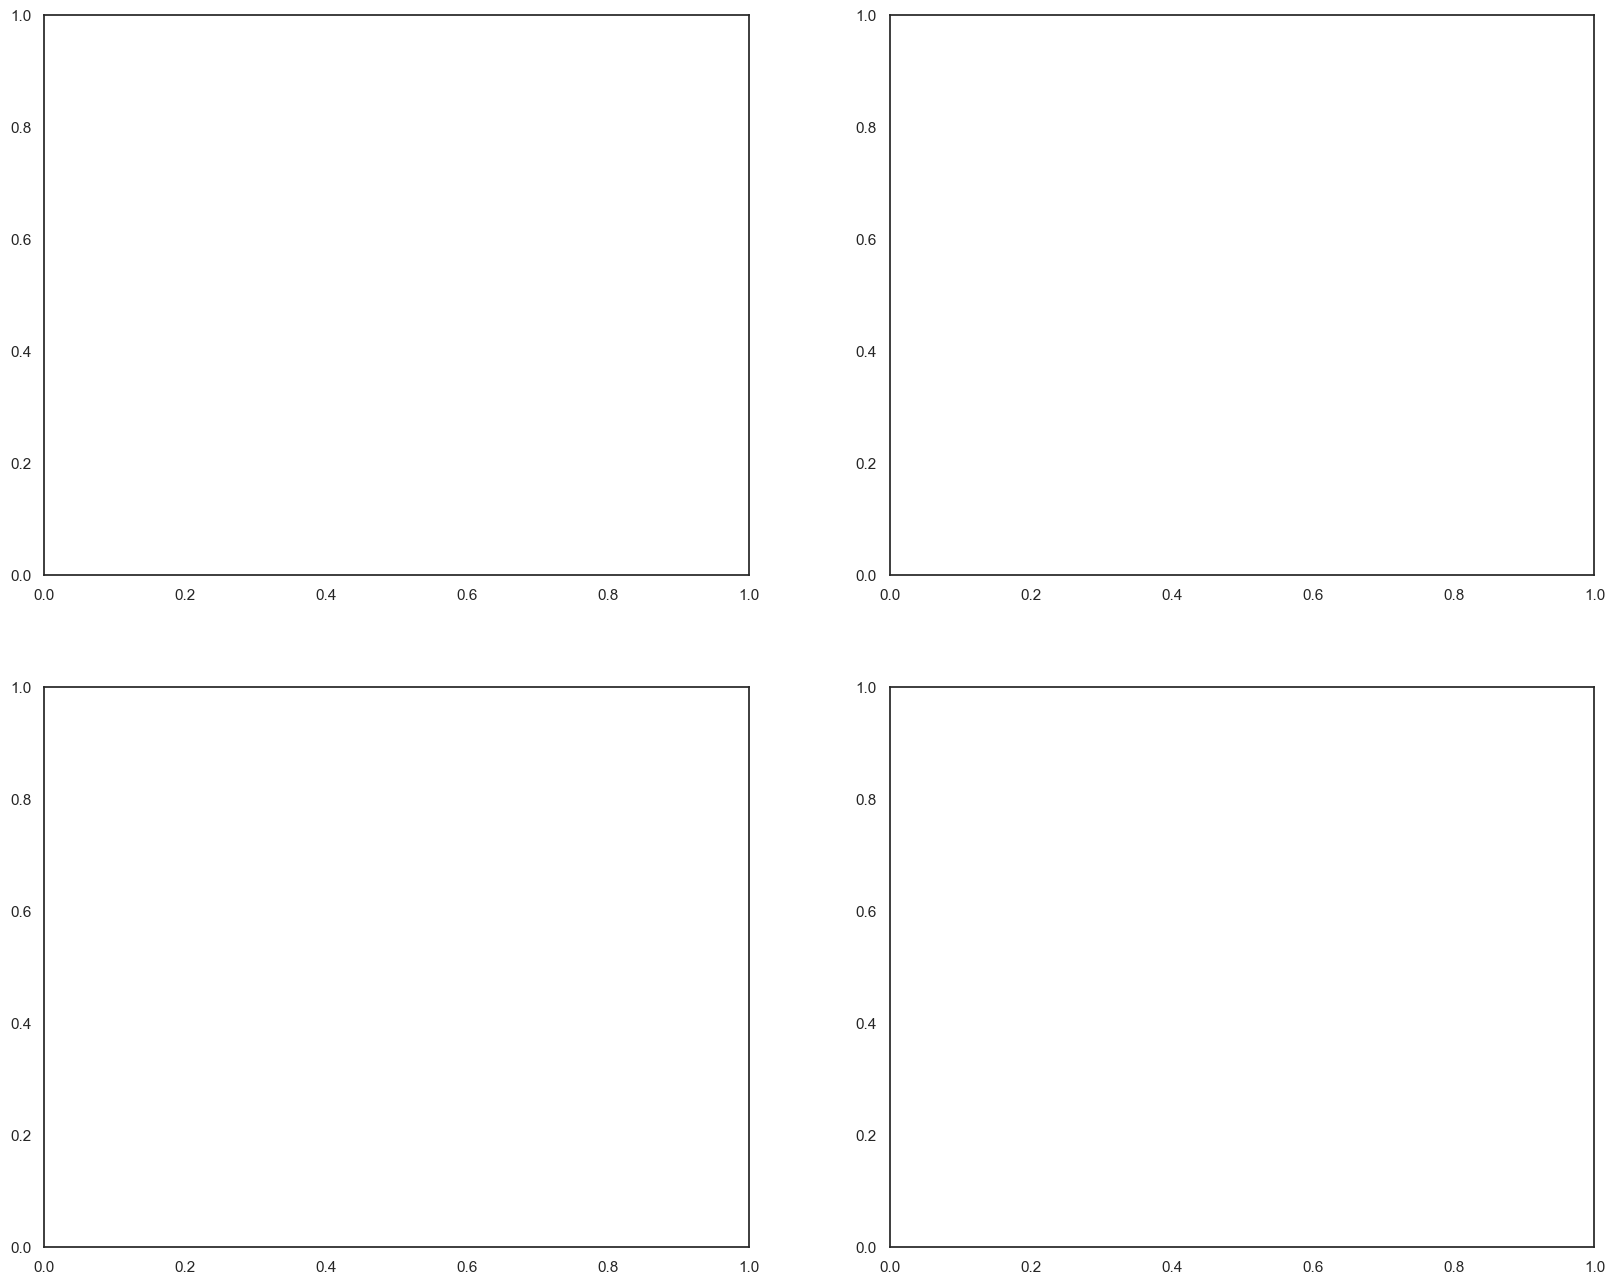

In [17]:
# Boxplot for distribution: 'view', 'waterfront', 'bedrooms', 'bathrooms'

fig = plt.figure(figsize=(20, 16))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#subplot1: box plot
sns.boxplot(df, x="view", y="price", width=.6, ax=ax0)
ax0.set_title("View", fontsize=15)

#subplot2: box plot
sns.boxplot(df, x="waterfront", y="price", width=.6, ax=ax1)
ax1.set_title("Waterfront", fontsize=15)

#subplot3: box plot
sns.boxplot(df, x="bedrooms", y="price", width=.6, ax=ax2)
ax2.set_title("Bedrooms", fontsize=15)

#subplot4: box plot
sns.boxplot(df, x="bathrooms", y="price", width=.6, ax=ax3)
ax3.set_title("Bathrooms", fontsize=15)

plt.show()

# 6. Pearson correlation coefficient and P-value

Correlation: a statistical measure of the extent of interdependence between two variables, so it means they change together at a constant rate.
Pearson correlation measures the linear dependence between two variables x and y and the value of coefficient is in between -1 and 1.

if coefficient value == 1: perfect positive linear correlation
if coefficient value == 0: nonlinear correlation
if coefficient value == -1: perfect negative linear correlation
The default method of the Pearson correlation function is "corr()" and the Pearson correlation of the 'int63' or 'float64' variables can be calculated by this method.

In [18]:
#Correlation matrix

co1_df = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'price']]
co2_df = co1_df.corr()
co2_df

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,yr_built,price
bedrooms,1.000000,0.515884,0.576671,0.155643,0.356967,0.477600,0.303093,0.154178,0.308350
bathrooms,0.515884,1.000000,0.754665,0.519019,0.664983,0.685342,0.283770,0.506019,0.525138
sqft_living,0.576671,0.754665,1.000000,0.353321,0.762704,0.876597,0.435043,0.318049,0.702035
floors,0.155643,0.519019,0.353321,1.000000,0.472608,0.517913,-0.235836,0.578619,0.237211
grade,0.356967,0.664983,0.762704,0.472608,1.000000,0.755923,0.168392,0.446963,0.667434
sqft_above,0.477600,0.685342,0.876597,0.517913,0.755923,1.000000,-0.051943,0.423898,0.605567
sqft_basement,0.303093,0.283770,0.435043,-0.235836,0.168392,-0.051943,1.000000,-0.133124,0.323816
yr_built,0.154178,0.506019,0.318049,0.578619,0.446963,0.423898,-0.133124,1.000000,0.054012
price,0.308350,0.525138,0.702035,0.237211,0.667434,0.605567,0.323816,0.054012,1.000000


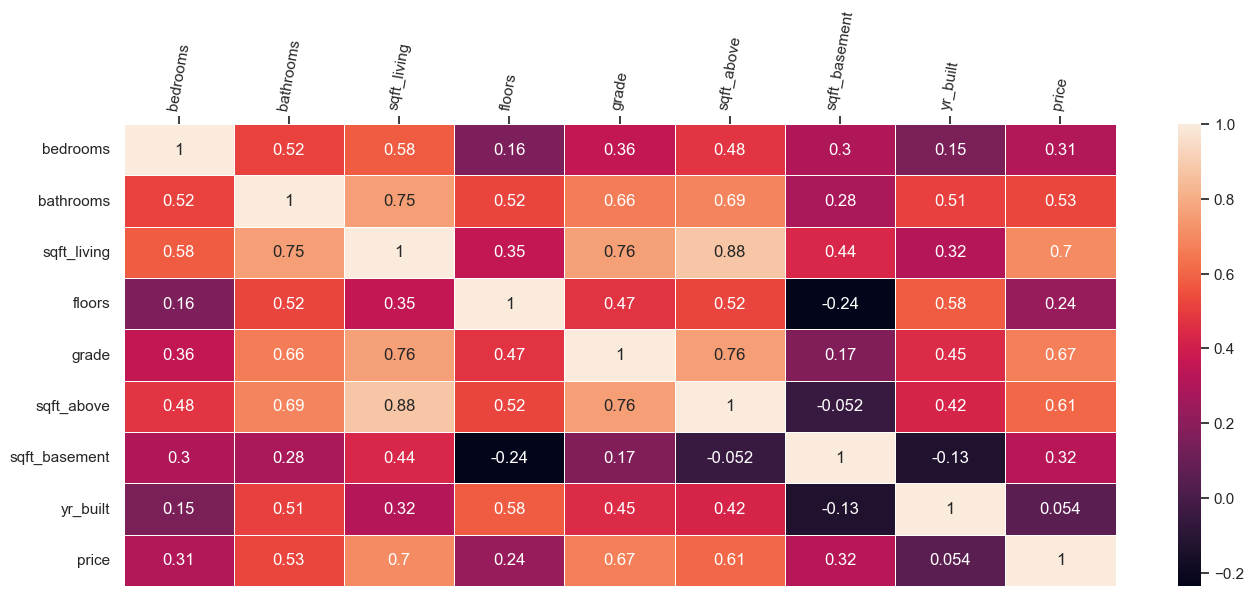

In [19]:
# plotting the heatmap 
# Use annot to represent the cell values with text: annnt = True
# Use methods on the matplotlib.axes.Axes object to tweak the plot: xaxis.tick_top()

fig = plt.figure(figsize=(16, 6))
ax = sns.heatmap(data=co2_df, linecolor = 'white', annot=True,linewidth=.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 80);
plt.show() 

# P-value
P-value: the probability value that the correlation between two variables is statistically significant.
If this probability is lower than the conventional 5%(p<0.05) the correlation coefficient is called statistically significant.

if p-value < 0.001: correlation is significant
if p-value < 0.05: moderate correlation
if p-value < 0.1: weak correlation
if p-value > 0.1: no evidence
Pearson's correlation coefficient r with P-value
The correlation expresses the degree that two variables change correspondingly.

In [20]:
# Import 'stats' to measure Pearson correlation coefficient and P-value

from scipy import stats
pearson_coef, p_value = stats.pearsonr(co2_df['sqft_living'], co2_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7668938645097698  with a P-value of P = 0.015893573227578155


In the output, the correlation between 'sqft_living' and 'price' is in statistically significant correlation relationship because the p-value is less than 0.05 while the linear relationship is moderately strong with the value, 0.770.

In [21]:
pearson_coef, p_value = stats.pearsonr(co2_df['grade'], co2_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6480279358210956  with a P-value of P = 0.05909691025742395


The correlation between 'grade' and 'price' is in weak correlation relationship because the p-value is greater than 0.05, while the linear relationship is in weak correlation with the value, 0.648.

# Model developing:

A.Training the random forest model

In [ ]:
# sklearn for machine learing and machine learnign pipeline related funtions

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#import shap # explain the model

# choose target
y = df.price
#choose feature
X = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']
X = df[X]

#Train and test split
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

# B.Tuning the model

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds_y = forest_model.predict(test_X)

# Model Evaluation:

A. Validation techniques

In [ ]:
print("Mean absolute error:",mean_absolute_error(test_y, preds_y))
print("R2-score: %.2f" % r2_score(test_y, preds_y))